In [2040]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#  Data

| Column Name   | Details                                                                                             |
|:---------------|:-----------------------------------------------------------------------------------------------------|
| recipe        | Numeric, unique identifier of recipe                                                                 |
| calories      | Numeric, number of calories                                                                          |
| carbohydrate  | Numeric, amount of carbohydrates in grams                                                            |
| sugar         | Numeric, amount of sugar in grams                                                                    |
| protein       | Numeric, amount of protein in grams                                                                  |
| category      | Character, type of recipe. Recipes are listed in one of ten groupings (Lunch/Snacks, Beverages, Potato, Vegetable, Meat, Chicken, Pork, Dessert, Breakfast, One Dish Meal). |
| servings      | Numeric, number of servings for the recipe                                                           |
| high_traffic  | Character, indicates whether traffic was high when the recipe was featured ("High").                 |


In [2041]:
data=pd.read_csv('recipe_site_traffic.csv',sep=';')
data

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


 * Data Information

In [2042]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


 * Checking for Missing Values

In [2043]:
data.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

#  Handling Missing Values

In [2044]:
data['calories']=data['calories'].fillna(data['calories'].median())
data['carbohydrate']=data['carbohydrate'].fillna(data['carbohydrate'].median())
data['sugar']=data['sugar'].fillna(data['sugar'].median())
data['protein']=data['protein'].fillna(data['protein'].median())
# data.dropna(subset=['calories','carbohydrate','sugar','protein'],inplace=True)

In [2045]:
data['high_traffic']=data['high_traffic'].fillna('Low')

In [2046]:
data.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [2047]:
category_columns=data.select_dtypes('object')
for col in category_columns:
    print(f'{col}  : \n number of unique value for each category column  =  {data[col].nunique()}  , \n unique value {data[col].unique()}')
    print('='*50)
    

category  : 
 number of unique value for each category column  =  11  , 
 unique value ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
servings  : 
 number of unique value for each category column  =  6  , 
 unique value ['6' '4' '1' '2' '4 as a snack' '6 as a snack']
high_traffic  : 
 number of unique value for each category column  =  2  , 
 unique value ['High' 'Low']


 * Checking for Duplicate Records

In [2048]:
data.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

 1- Univariate Analysis

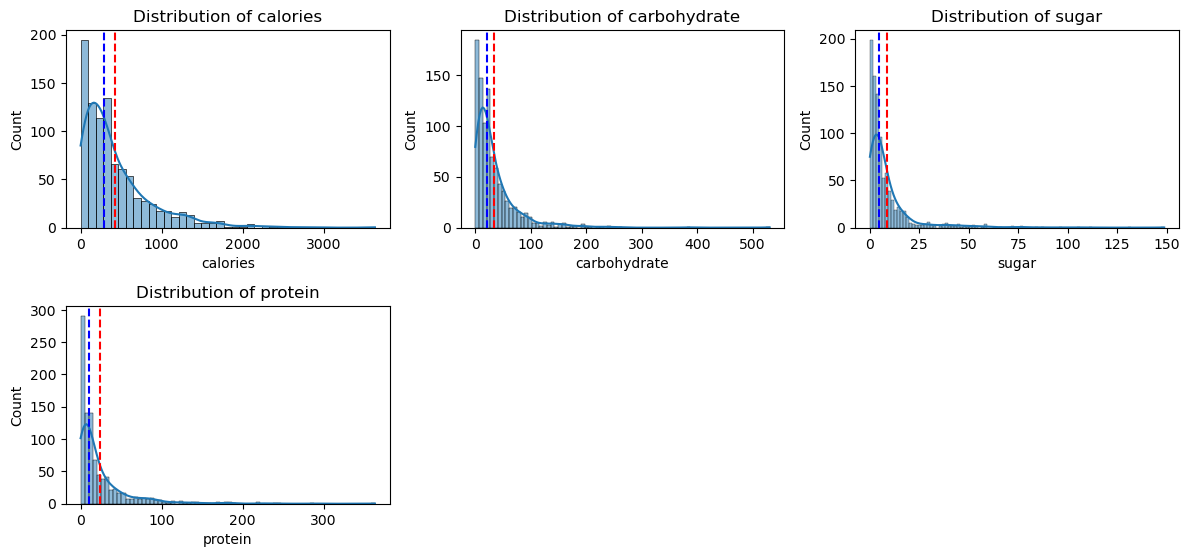

In [2049]:
plt.figure(figsize=(12,8))
numeric_columns=data.select_dtypes('number')
numeric_columns = numeric_columns.drop(columns=['recipe'])


for i , col in enumerate(numeric_columns):
    plt.subplot(3,3,i+1)
    sns.histplot(data[col],kde=True)
    plt.axvline(data[col].mean(),color='r',linestyle='--')
    plt.axvline(data[col].median(),color='b',linestyle='--')
    plt.title('Distribution of '+col)
    plt.tight_layout()

 * Since all the distributions are right-skewed, we will apply the Box-Cox transformation to normalize them.

In [2050]:
shift_value = abs(data[['calories', 'carbohydrate', 'sugar', 'protein']].min().min()) + 1
#The purpose of .min().min() is to ensure you're getting the absolute smallest value across multiple columns. Without the second .min(), you would only get the minimum values of each column, not the minimum value overall
#+1: It adds 1 to the result to avoid having a zero value in the dataset after shifting.
data['calories'] += shift_value
data['carbohydrate'] += shift_value
data['sugar'] += shift_value
data['protein'] += shift_value


 * Why is this done?
 .
 
Some transformations (like logarithmic or Box-Cox transformations) require all values to be positive.
If your dataset has zero or negative values, the transformation can't be applied directly.
Shifting the data by a positive value ensures that all values in the selected columns are strictly positive, making them ready for transformations.

Purpose of shift value: This ensures that the minimum value of all columns is positive and greater than zero,
    which is necessary for some transformation

In [2051]:
from scipy import stats

data['calories'], _ = stats.boxcox(data['calories'])
data['carbohydrate'], _ = stats.boxcox(data['carbohydrate'])
data['sugar'], _ = stats.boxcox(data['sugar'])
data['protein'], _ = stats.boxcox(data['protein'])


Box-Cox Transformation: This is a technique used to transform non-normal (often skewed) data to approximate a normal distribution.
.

Normalize Skewed Data: Box-Cox is particularly useful for right-skewed data


In [2052]:
print(data['calories'].min()) 
print(data['carbohydrate'].min())
print(data['sugar'].min())
print(data['protein'].min())


0.1331809402955826
0.029602512611075243
0.009940208296892062
0.0


there are no negative values

# Distribution after Box_Cox

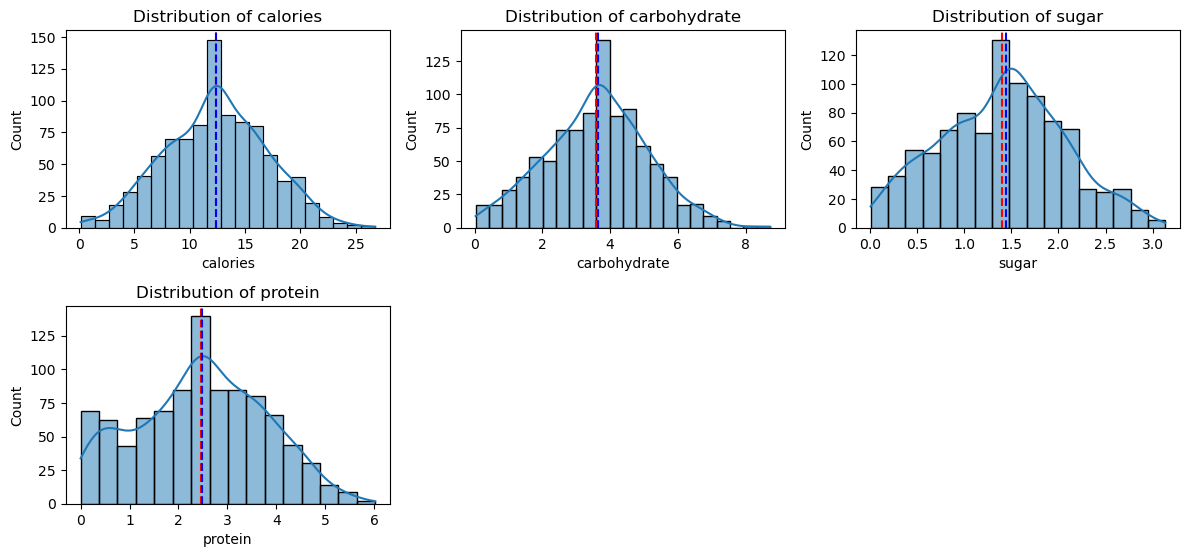

In [2053]:
plt.figure(figsize=(12, 8)) 
for i , col in enumerate(numeric_columns):
    plt.subplot(3,3,i+1)
    sns.histplot(data[col],kde=True)
    plt.axvline(data[col].mean(),color='r',linestyle='--')
    plt.axvline(data[col].median(),color='b',linestyle='--')
    plt.title('Distribution of '+col)
    plt.tight_layout()

the equality of mean and median is a good indicator of an approximately normal distribution

In [2054]:
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,12.416266,3.651219,1.445558,2.489757,Pork,6,High
1,2,5.807194,4.444895,0.481424,0.653832,Potato,4,High
2,3,17.850871,4.588695,1.223738,1.362354,Breakfast,1,Low
3,4,8.541220,4.122245,2.585342,0.019804,Beverages,4,High
4,5,5.186333,1.104103,0.553815,0.425908,Beverages,4,Low


After applying Box-Cox transformation, the values in the columns should be positive, less skewed, more symmetrically distributed

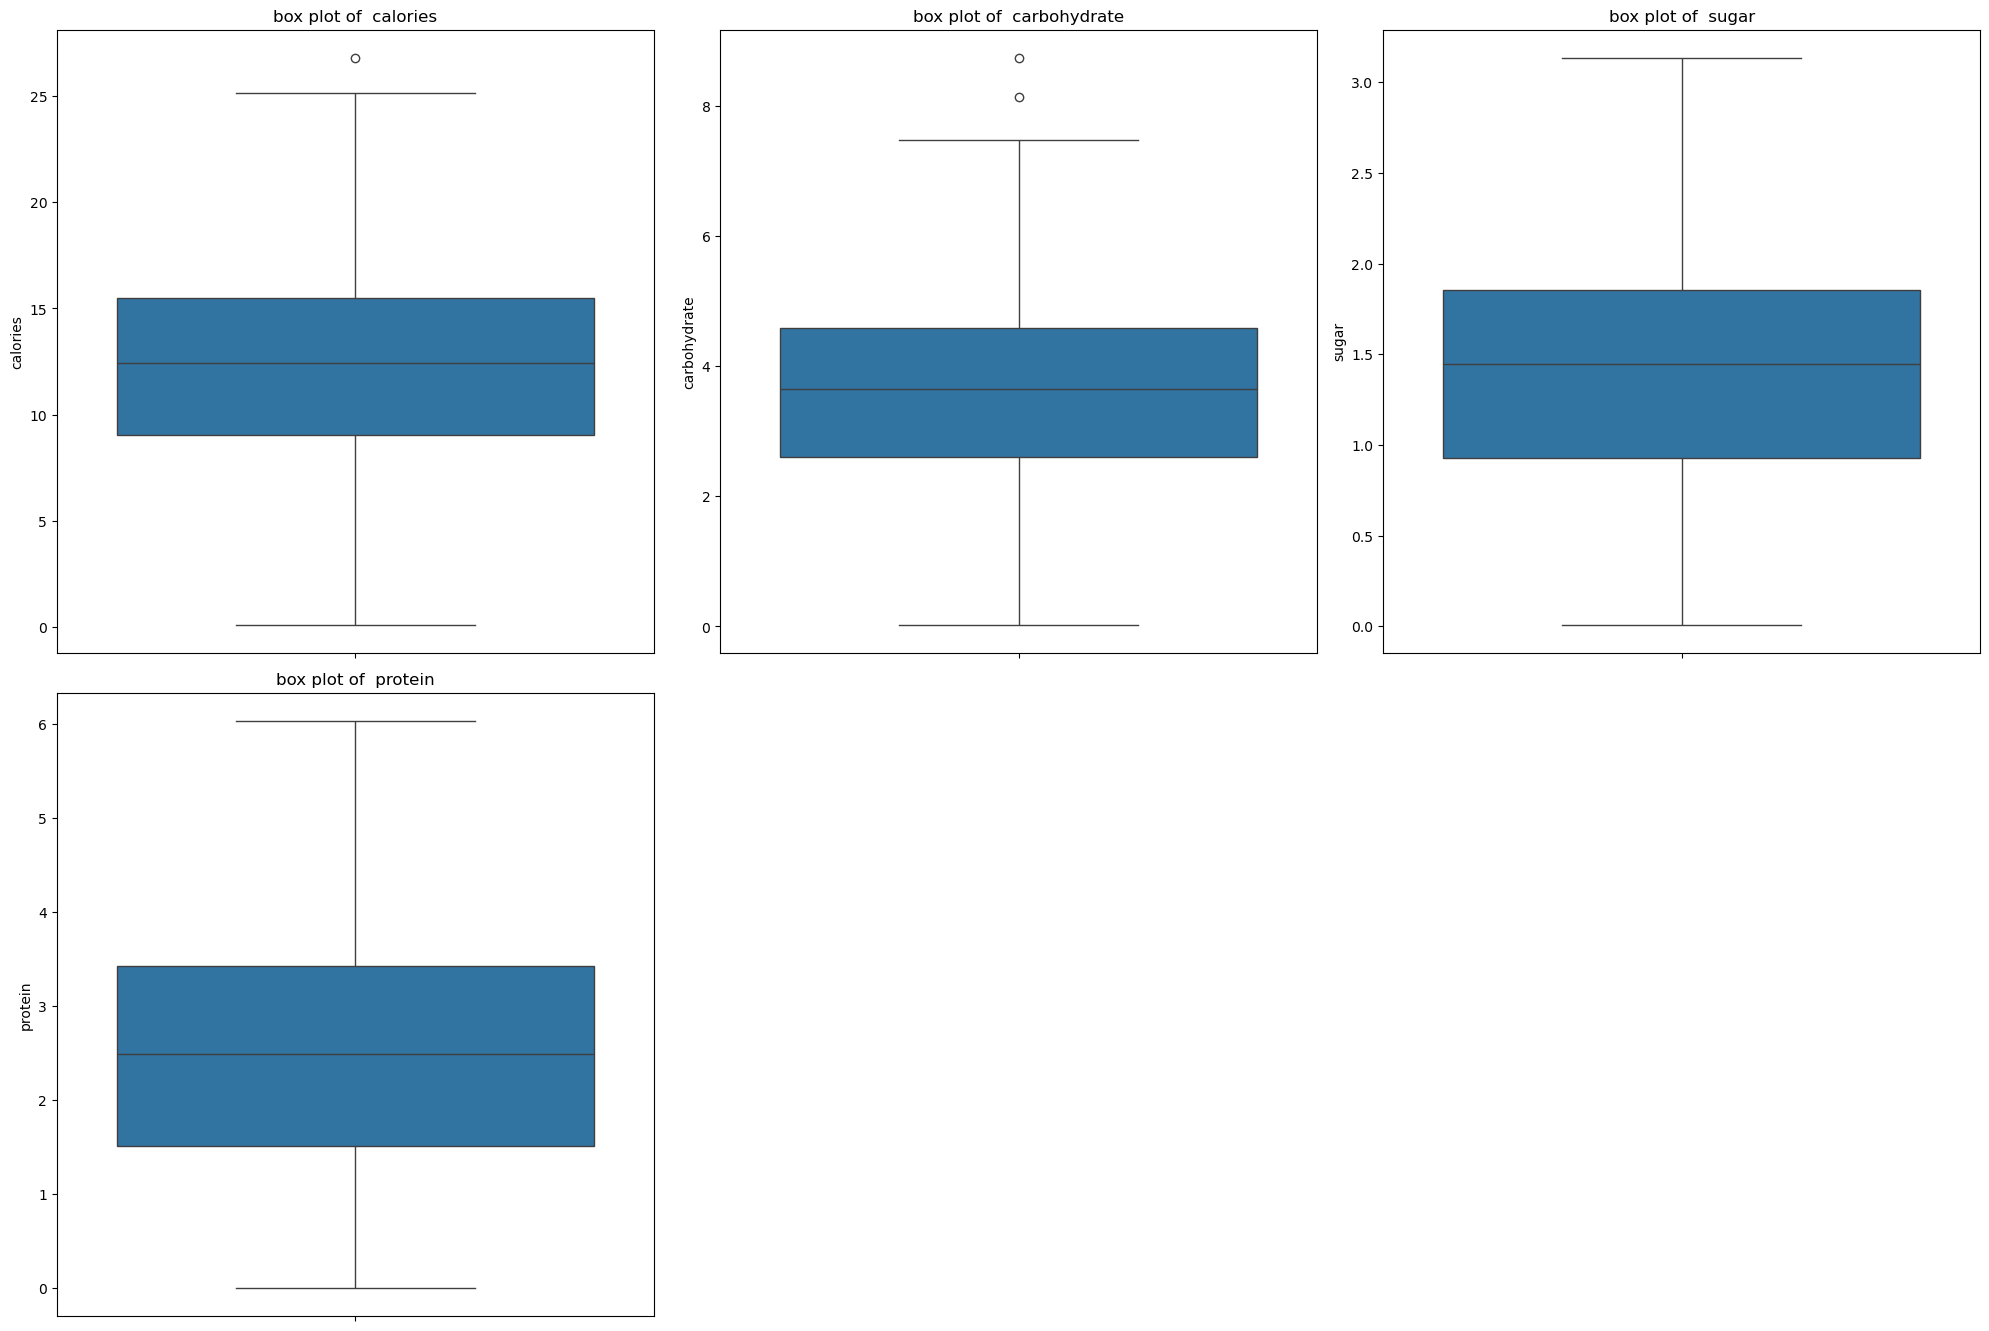

In [2055]:
plt.figure(figsize=(20,20))

for i , col in enumerate(numeric_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[col])
    plt.title('box plot of  '+col)
    plt.tight_layout()

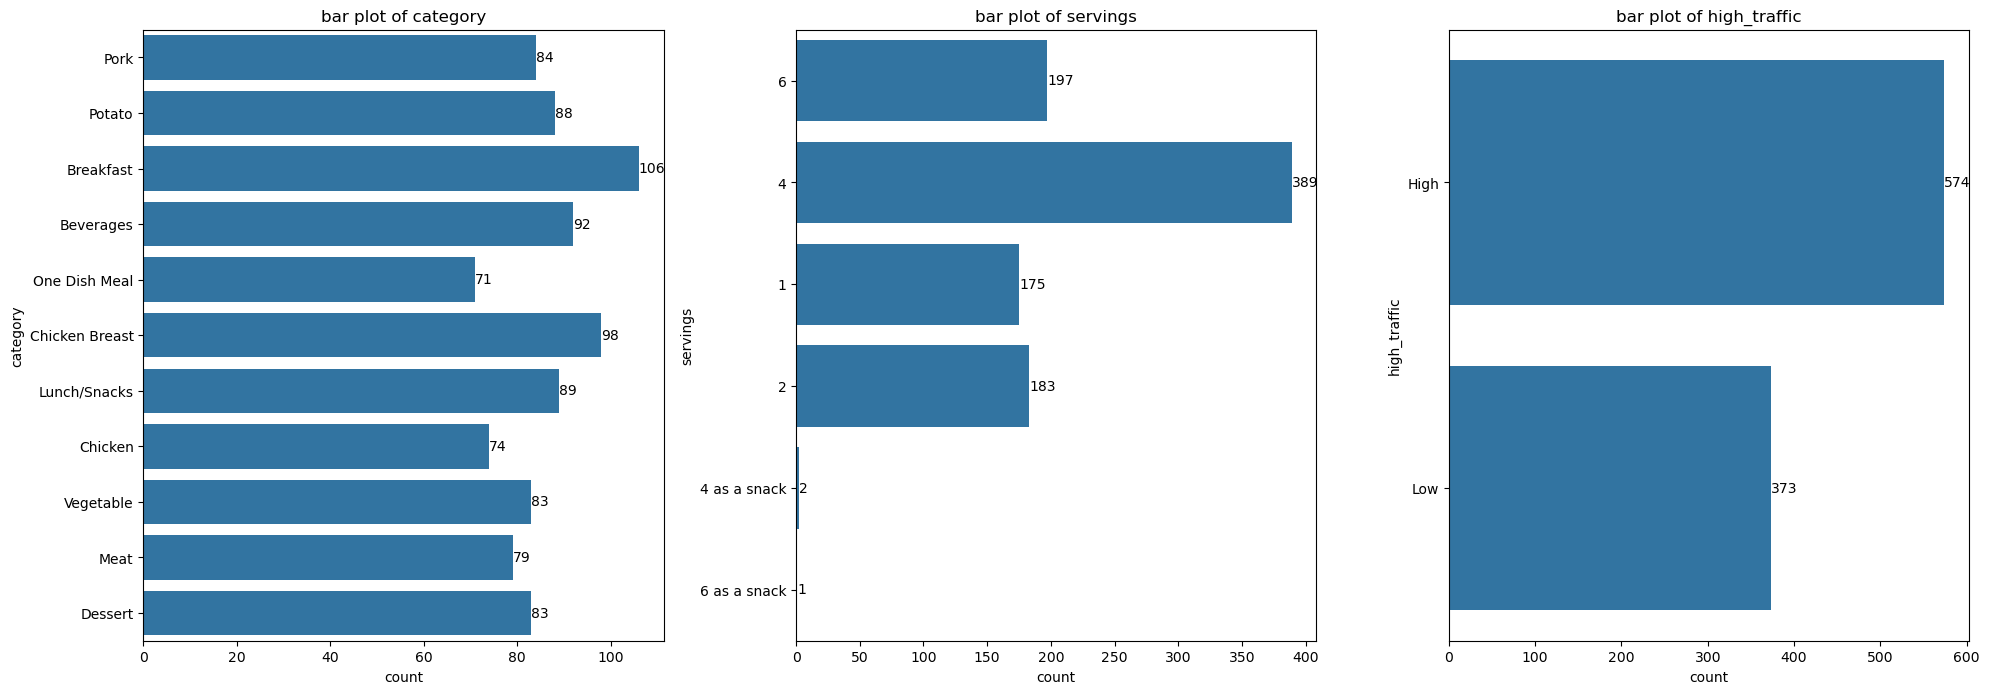

In [2056]:
category_columns=data.select_dtypes('object')

plt.figure(figsize=(20,20))
for i , col in enumerate(category_columns):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(data[col])
    ax.bar_label(ax.containers[0])
    plt.title('bar plot of '+col)
    plt.tight_layout()
plt.show()

 2 - Bivariate Analysis

high_traffic    High  Low
category                 
Beverages          5   87
Breakfast         33   73
Chicken           27   47
Chicken Breast    46   52
Dessert           53   30
Lunch/Snacks      57   32
Meat              59   20
One Dish Meal     52   19
Pork              77    7
Potato            83    5
Vegetable         82    1


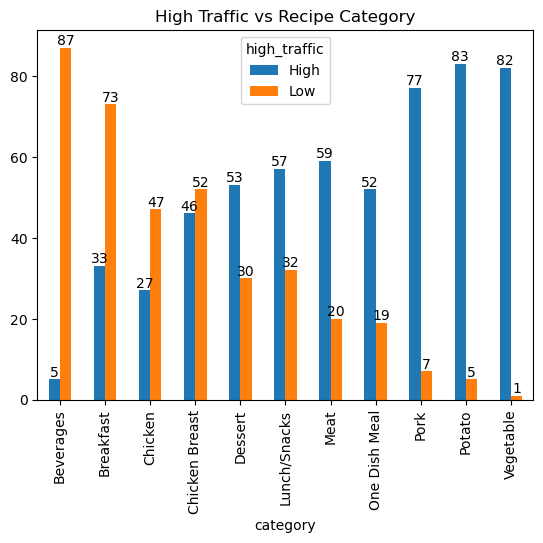

In [2057]:
crossTab_data=pd.crosstab(data['category'],data['high_traffic'])
print(crossTab_data)

ax = crossTab_data.plot(kind='bar', title='High Traffic vs Recipe Category')
for container in ax.containers:
    ax.bar_label(container)

In [2060]:
high_traffic_recipes=data[data['high_traffic']=='High']
most_high_traffic_recipes=high_traffic_recipes.loc[high_traffic_recipes['calories'].idxmax()]
print(most_high_traffic_recipes)

recipe                125
calories        25.115496
carbohydrate     1.628182
sugar            0.953937
protein          5.290723
category             Pork
servings                6
high_traffic         High
Name: 124, dtype: object


3- Multi variate

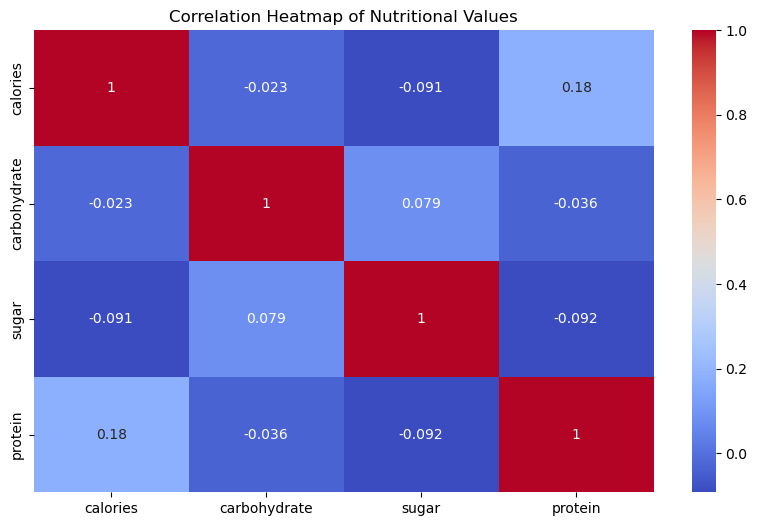

In [2058]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Nutritional Values')
plt.show()

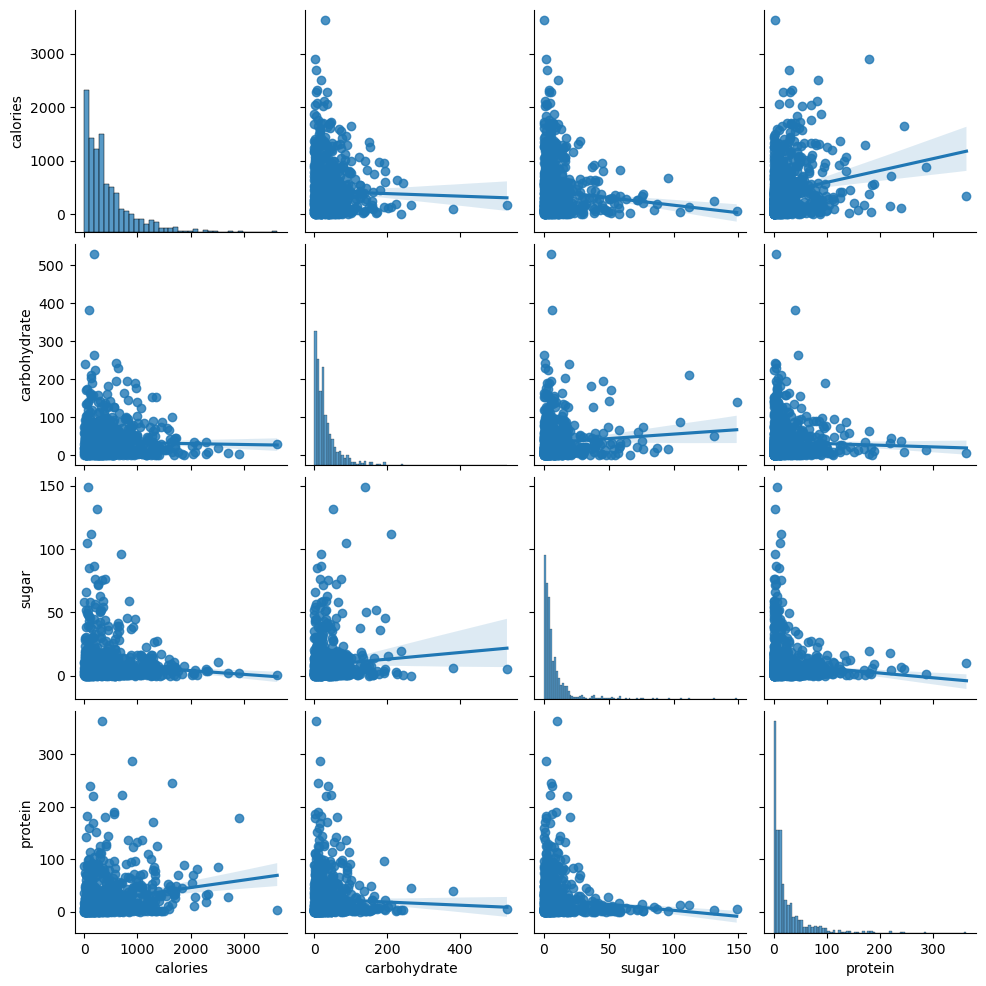

In [2059]:
sns.pairplot(numeric_columns,kind='reg')

 * Convert 'high_traffic' to Numeric Values

In [2061]:
data['high_traffic']=data['high_traffic'].apply(lambda x : 1 if x== 'High' else 0)

 * Label Encoding for Categorical Variables

In [2062]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['servings']=le.fit_transform(data['servings'])
data['category']=le.fit_transform(data['category'])
data.sample(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
855,856,9.811703,2.177230,0.413258,1.803156,8,2,1
132,133,8.431285,1.683573,2.457174,1.736909,4,2,1
475,476,6.909354,1.678634,1.714484,0.734267,10,2,1
392,393,14.432408,3.481760,2.180695,4.026536,2,2,0
535,536,16.371853,1.989855,0.700534,2.643248,10,2,1
921,922,11.671777,4.222344,1.273041,3.778157,1,2,0
407,408,12.029882,1.428172,1.815816,0.076982,0,4,0
288,289,5.817214,1.341039,2.245277,0.165611,0,0,0
183,184,7.226342,2.195783,0.513317,2.828848,10,2,0
790,791,8.706207,4.700005,2.138088,2.029322,5,4,0


In [2063]:
data.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category          int32
servings          int32
high_traffic      int64
dtype: object

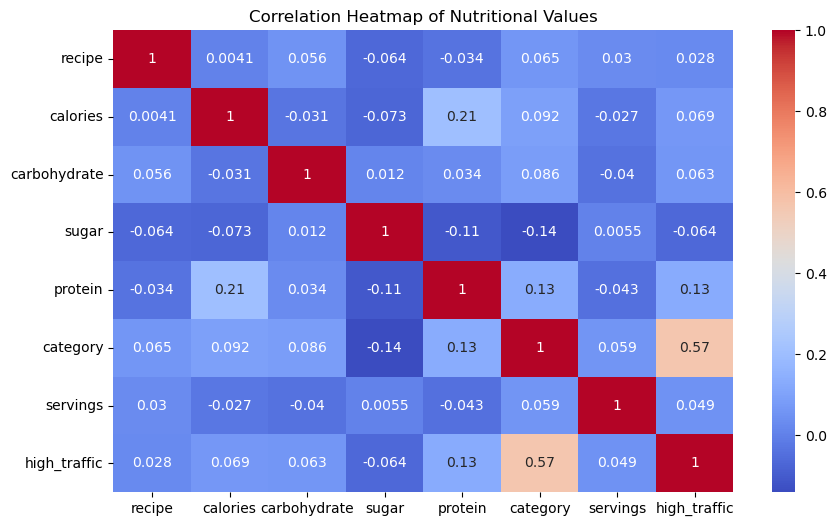

In [2064]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Nutritional Values')
plt.show()

there is a Moderate Correlation between high_tafic & category 
.  
 weak correlation between high_tafic & protein

# Prediction
Using the recipes variable helps link predictions to individual dishes, making it simpler to analyze how well the model did. This way, you can see which recipes were popular or not, and make informed decisions about your menu.

In [2065]:
from sklearn.model_selection import train_test_split

X = data[['category']]  
y = data['high_traffic']
recipes = data['recipe']  # we use recipes in train_test_split to help us in model to determine which recipe is popular  

X_train, X_test, y_train, y_test,recipes_train, recipes_test  = train_test_split(X, y,recipes, test_size=0.2, random_state=42,stratify=y)



In [2066]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [2067]:
X.columns

Index(['category'], dtype='object')

In [2068]:
# Check the distribution of the target variable
print(y_train.value_counts())
print(y_test.value_counts())


high_traffic
1    459
0    298
Name: count, dtype: int64
high_traffic
1    115
0     75
Name: count, dtype: int64


Both datasets show a slight imbalance so we will use classifcation report not confusion matrix

# Logistic Regression

In [2069]:
import statsmodels.api as sm

X=sm.add_constant(X)
logit_model = sm.Logit(y, X)


In [2070]:
results=logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.486907
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           high_traffic   No. Observations:                  947
Model:                          Logit   Df Residuals:                      945
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Sep 2024   Pseudo R-squ.:                  0.2738
Time:                        21:50:52   Log-Likelihood:                -461.10
converged:                       True   LL-Null:                       -634.92
Covariance Type:            nonrobust   LLR p-value:                 1.391e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6570      0.149    -11.139      0.000      -1.949      -1.365
category       0.4806      0.

p-value of category < 0.5

In [2071]:
X.head()

,const,category
0,1.0,8
1,1.0,9
2,1.0,1
3,1.0,0
4,1.0,0


# Grid_Search Algorithm

1- we used grid search tio help us in tunning parameters

In [2072]:

from sklearn.model_selection import GridSearchCV

param_grids = {
    "logistic_Model": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    

    "random_model": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
   
    "gradient_model": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "knn": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
     "svm_model": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
     "xgboost_model": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    }
}

# Function to perform GridSearchCV
def perform_grid_search(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_scaled, y_train)
    return grid_search



# Models

In [2073]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'xgboost_model': XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.1),
    'gradient_model': GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=100),
    'logistic_Model': LogisticRegression(C=0.1, penalty='l2', solver='liblinear'),
    'svm_model': SVC(C=0.1, gamma='scale', kernel='linear'),
    'knn': KNeighborsClassifier(n_neighbors=9, weights='uniform'),
    'random_model': RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=100)
}


we make tunnig parameters for models

In [2074]:
#  GridSearchCV for each model
for name, model in models.items():
    print(f"Performing Grid Search for {name}...")
    grid_search = perform_grid_search(model, param_grids[name])
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best accuracy for {name}: {grid_search.best_score_}")
    print("-" * 50)

Performing Grid Search for xgboost_model...
Best parameters for xgboost_model: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best accuracy for xgboost_model: 0.7581997211571976
--------------------------------------------------
Performing Grid Search for gradient_model...
Best parameters for gradient_model: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best accuracy for gradient_model: 0.7581997211571976
--------------------------------------------------
Performing Grid Search for logistic_Model...
Best parameters for logistic_Model: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy for logistic_Model: 0.7581997211571976
--------------------------------------------------
Performing Grid Search for svm_model...
Best parameters for svm_model: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy for svm_model: 0.7581997211571976
--------------------------------------------------
Performing Grid Search for knn...
Best p

In [2075]:
from sklearn.metrics import accuracy_score, classification_report

for name , model in models.items():
    model.fit(x_train_scaled,y_train)
    y_pred=model.predict(x_test_scaled)
    print(f"{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

xgboost_model:
Accuracy: 0.8157894736842105
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        75
           1       0.83      0.87      0.85       115

    accuracy                           0.82       190
   macro avg       0.81      0.80      0.80       190
weighted avg       0.81      0.82      0.81       190

--------------------------------------------------
gradient_model:
Accuracy: 0.7789473684210526
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        75
           1       0.85      0.77      0.81       115

    accuracy                           0.78       190
   macro avg       0.77      0.78      0.77       190
weighted avg       0.79      0.78      0.78       190

--------------------------------------------------
logistic_Model:
Accuracy: 0.7789473684210526
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        75
 

# the best accuracy from xgboost_model : 82%

# Comparing Predictions with Actual Values Using recipes_test


In [2076]:
xgboost_model = models['xgboost_model']

In [2077]:
xgboost_model.fit(x_train_scaled,y_train)
y_pred_xgb = xgboost_model.predict(x_test_scaled)
resault=pd.DataFrame({'Recipe':recipes_test,'Actuel':y_test , 'Predicted':y_pred_xgb})
resault

,Recipe,Actuel,Predicted
44,45,0,0
116,117,1,1
343,344,1,0
4,5,0,0
503,504,1,1
...,...,...,...
104,105,0,0
167,168,1,1
118,119,0,1
102,103,0,1


# Predicted Popular Recipes from resault_table_comparison

In [2078]:
popular_recipe=resault[resault['Predicted']==1]
popular_recipe

,Recipe,Actuel,Predicted
116,117,1,1
503,504,1,1
640,641,1,1
580,581,0,1
868,869,1,1
...,...,...,...
39,40,1,1
167,168,1,1
118,119,0,1
102,103,0,1


# Describe popular_recipe

In [2086]:
popular_recipe.describe().T

,count,mean,std,min,25%,50%,75%,max
Recipe,120.0,443.666667,275.232288,6.0,208.25,425.5,679.5,910.0
Actuel,120.0,0.833333,0.374241,0.0,1.00,1.0,1.0,1.0
Predicted,120.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0


# the Most Frequently Predicted Popular Recipe

In [2082]:
most_popular_recipe = popular_recipe['Recipe'].value_counts().idxmax()
print(f"The most popular recipe predicted by the model is: {most_popular_recipe}")# it get the mose frequence 

The most popular recipe predicted by the model is: 117


# Visualizing the Frequency of Predicted Popular Recipes

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14916\379840008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_recipe_counts.values, y=popular_recipe_counts.index, palette='viridis')


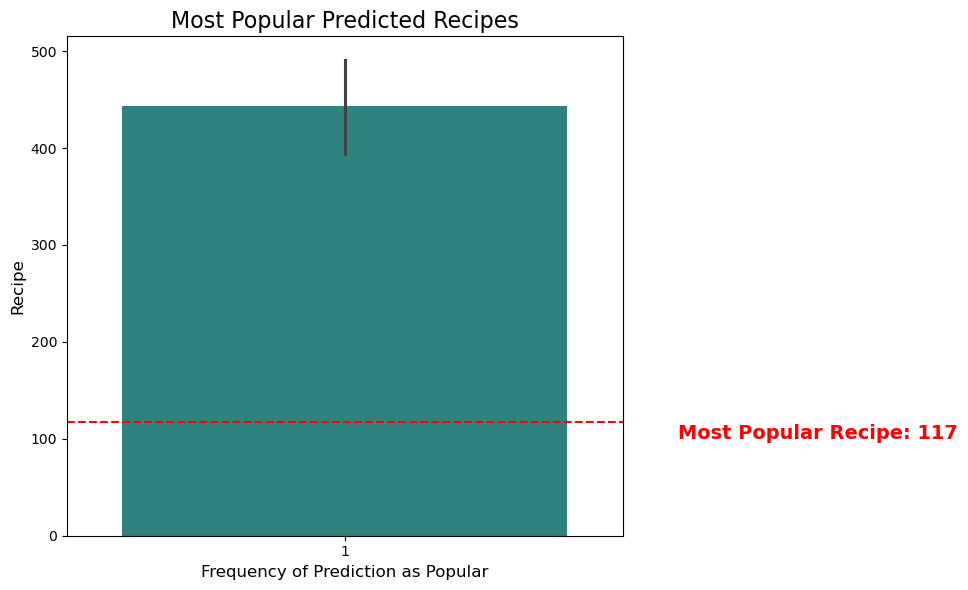

In [2083]:

popular_recipe_counts = popular_recipe['Recipe'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=popular_recipe_counts.values, y=popular_recipe_counts.index, palette='viridis')

plt.title('Most Popular Predicted Recipes', fontsize=16)
plt.xlabel('Frequency of Prediction as Popular', fontsize=12)
plt.ylabel('Recipe', fontsize=12)
plt.axhline(y=most_popular_recipe, color='r', linestyle='--')
plt.text(0.6, 100, f"Most Popular Recipe: {most_popular_recipe}", color='red', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [2084]:
X_train.category.unique()

array([ 7,  9, 10,  0,  8,  2,  5,  1,  4,  6,  3])

<Axes: xlabel='category'>

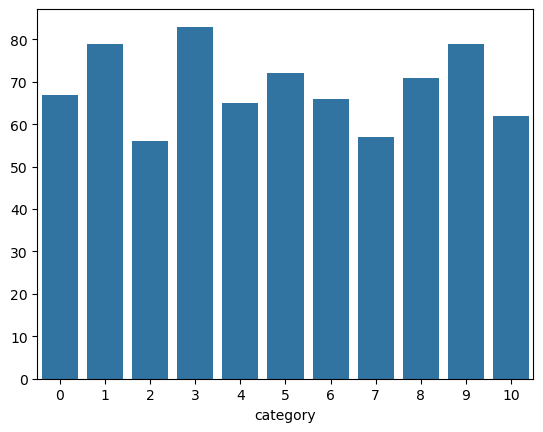

In [2085]:
category_counts = X_train['category'].value_counts()
sns.barplot(y=category_counts.values ,x=category_counts.index)